In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
reddit = pd.read_csv('reddit_data_example.csv')
reddit.head()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio
0,2/9/2023 20:12,reddit.com,neutral,en,AutoModerator,reply,2397363,0,2000,NaN,1,NaN
1,2/9/2023 17:42,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
2,2/9/2023 17:41,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
3,2/8/2023 22:12,reddit.com,negative,en,KaylaST,reply,110,14,1470,NaN,1,NaN
4,2/8/2023 20:15,reddit.com,negative,en,CaveLady3000,post,311,73,4148,0.0,1,1.0


In [4]:
reddit.index

RangeIndex(start=0, stop=8137, step=1)

In [5]:
reddit.columns

Index(['Date', 'Domain', 'Sentiment', 'Language', 'Author',
       'Thread Entry Type', 'Reddit Author Awardee Karma',
       'Reddit Author Awarder Karma', 'Reddit Author Karma', 'Reddit Comments',
       'Reddit Score', 'Reddit Score Upvote Ratio'],
      dtype='object')

In [6]:
reddit.shape
# Gives number of rows and columns

(8137, 12)

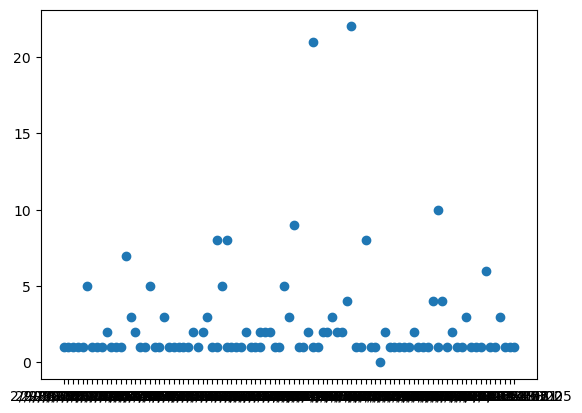

In [9]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = reddit['Date'][0:100], y = reddit['Reddit Score'][0:100])

plt.show()

In [11]:
reddit['Date'][0]

'2/9/2023 20:12'

In [13]:
reddit['datetime'] = pd.to_datetime(reddit['Date'])
reddit['datetime']

0      2023-02-09 20:12:00
1      2023-02-09 17:42:00
2      2023-02-09 17:41:00
3      2023-02-08 22:12:00
4      2023-02-08 20:15:00
               ...        
8132   2019-07-09 17:12:00
8133   2019-07-09 13:04:00
8134   2019-07-09 12:55:00
8135   2017-07-08 00:35:00
8136   2017-06-20 00:01:00
Name: datetime, Length: 8137, dtype: datetime64[ns]

In [14]:
reddit['datetime'][0]

Timestamp('2023-02-09 20:12:00')

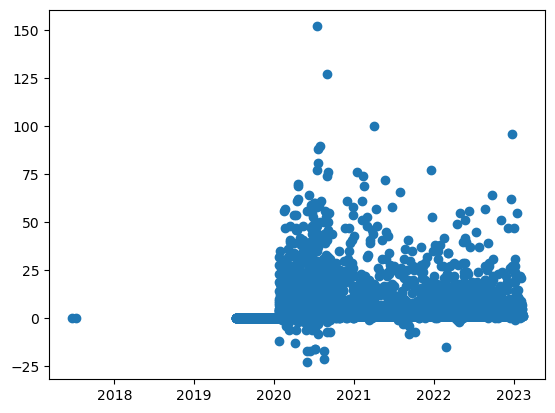

In [15]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = reddit['datetime'], y = reddit['Reddit Score'])

plt.show()

In [17]:
reddit[reddit['datetime'] > pd.to_datetime('June 15, 2021')].shape

(2673, 13)

In [18]:
post_covid = reddit[reddit['datetime'] > pd.to_datetime('June 15, 2021')]

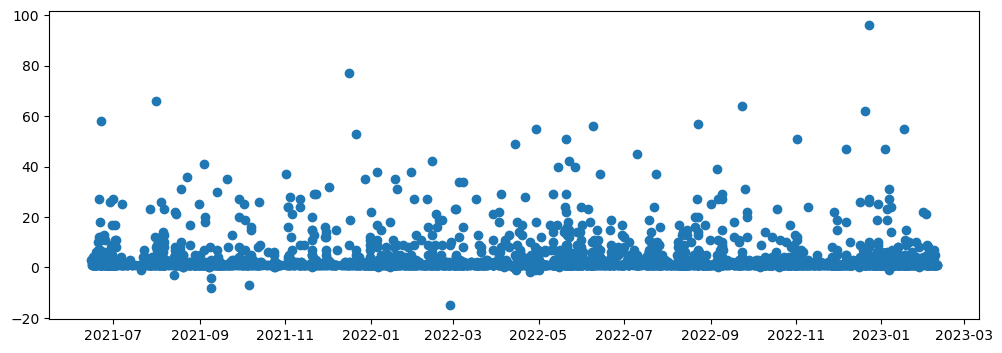

In [27]:
fig3, ax3 = plt.subplots(figsize = (12,4))
ax3.scatter(x = post_covid['datetime'], y = post_covid['Reddit Score'])

plt.show()

In [20]:
reddit['datetime'].dt.date[0]

datetime.date(2023, 2, 9)

In [22]:
reddit_count_by_day = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()
reddit_count_by_day

datetime
2017-06-20    1
2017-07-08    1
2019-07-09    4
2019-07-10    2
2019-07-11    1
             ..
2023-02-05    4
2023-02-06    2
2023-02-07    7
2023-02-08    9
2023-02-09    3
Name: Reddit Score, Length: 1181, dtype: int64

In [24]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq = 'D')
rds = pd.Series(reddit_count_by_day, index = date_range)
rds_mean_fill = rds.fillna(0)

In [25]:
rds

2017-06-20    1.0
2017-06-21    NaN
2017-06-22    NaN
2017-06-23    NaN
2017-06-24    NaN
             ... 
2023-02-05    4.0
2023-02-06    2.0
2023-02-07    7.0
2023-02-08    9.0
2023-02-09    3.0
Freq: D, Name: Reddit Score, Length: 2061, dtype: float64

In [26]:
rds_mean_fill

2017-06-20    1.0
2017-06-21    0.0
2017-06-22    0.0
2017-06-23    0.0
2017-06-24    0.0
             ... 
2023-02-05    4.0
2023-02-06    2.0
2023-02-07    7.0
2023-02-08    9.0
2023-02-09    3.0
Freq: D, Name: Reddit Score, Length: 2061, dtype: float64

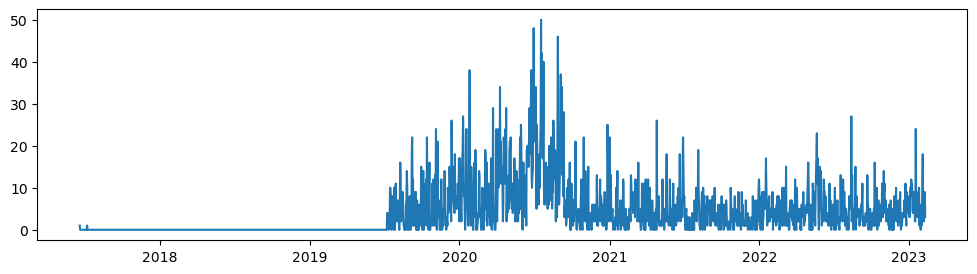

In [29]:
fig5, ax5 = plt.subplots(figsize = (12, 3))
ax5.plot(rds_mean_fill.index, rds_mean_fill)

plt.show()

In [30]:
date_range_month = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq = 'ME')